<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: World Development Statistics

--- 
# Part 1

Part 1 requires knowledge of basic Python.

---

## Problem Statement

As societies experience significant demographic shifts, with aging populations increasing worldwide, the importance of effective retirement planning on a nationwide scale has become more pronounced. This study aims to provide valuable insights into optimal retirement destinations, examining key factors such as Gross National Income (GNI), cost of living, and life expectancy across different countries. Targeting individuals nearing retirement age, as well as financial planners and advisors, the analysis explores the complexities of retirement preparation. Additionally, it addresses the needs of individuals who prioritize financial stability and aspire to retire early, recognizing their distinct goals in achieving financial independence and early retirement.


### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

As retirement rates continue to rise globally, there is an increasing need for identifying optimal locations for retirees to spend their later years.

### Datasets:

* [`life_expectancy.csv`](./data/life_expectancy.csv): Life Expectancy by Country
* [`gni_per_cap_atlas_method_con2021.csv`](./data/gni_per_cap_atlas_method_con2021.csv): Gross National Income (GNI) per capita in current US dollars
* [`happiness_score.csv`](./data/happiness_score.csv): Happiness Score by Country
* [`cost_of_living_2024.csv`](./data/cost_of_living_2024.csv): Average monthly cost of living per Country

### Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [398]:
# Code:
def calculate_mean(values):
    return sum(values)/len(values)

calculate_mean([1,2,5,8])

4.0

2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [399]:
# Code:
def std(values):
    n = len(values)
    mean = calculate_mean(values)
    std = ((1 / n) * sum([((x - mean)**2) for x in values]))**0.5
    return std

std([1,2,5,8])

2.7386127875258306

3. Data cleaning function:
    
    Write a function that takes in a string consisting a number and an abbreviated place value (ex. '5M', '45K'), and converts that string to an integer. For example, inputting '5M' in your function should return 5000000, '45K' should return 45000, etc. Make sure to test your function to make sure it works!

You will use these functions later on in the project!

In [400]:
# Code:
def convert_to_int(input):
    dict={
        'M': 1000000,
        'K': 1000
    }
    string = str(input)
    last_char = string[-1].upper()
    if last_char in dict:
        factor = dict.get(last_char)
        x = float(string.rstrip(string[-1]))
        return int(x * factor)
    else:
        return input

convert_to_int('47.9k')

47900

--- 
# Part 2

Part 2 requires knowledge of Pandas, EDA, data cleaning, and data visualization.

---

*All libraries used should be added here*

In [401]:
# Imports:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Import and Cleaning

### Data Import & Cleaning

In [402]:
# Code:
#importing data sets 
life_expectancy = pd.read_csv('../data\life_expectancy.csv')
gni = pd.read_csv('../data/gni_per_cap_atlas_method_con2021.csv')
happiness = pd.read_csv('../data/happiness_score.csv')
cost_of_living = pd.read_csv('../data/cost_of_living_2024.csv')

In [403]:
#Display data/check for missing values for each data set 

In [404]:
life_expectancy.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,...,75.5,75.7,75.8,76.0,76.1,76.2,76.4,76.5,76.6,76.8
1,Angola,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,78.8,79.0,79.1,79.2,79.3,79.5,79.6,79.7,79.9,80.0
2,Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,87.4,87.5,87.6,87.7,87.8,87.9,88.0,88.2,88.3,88.4
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,United Arab Emirates,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,...,82.4,82.5,82.6,82.7,82.8,82.9,83.0,83.1,83.2,83.3


In [405]:
life_expectancy.isna().sum()  #9 null values in a few years, possibly from same 9 countries 

country    0
1800       9
1801       9
1802       9
1803       9
1804       9
1805       9
1806       9
1807       9
1808       9
1809       9
1810       9
1811       9
1812       9
1813       9
1814       9
1815       9
1816       9
1817       9
1818       9
1819       9
1820       9
1821       9
1822       9
1823       9
1824       9
1825       9
1826       9
1827       9
1828       9
1829       9
1830       9
1831       9
1832       9
1833       9
1834       9
1835       9
1836       9
1837       9
1838       9
1839       9
1840       9
1841       9
1842       9
1843       9
1844       9
1845       9
1846       9
1847       9
1848       9
1849       9
1850       9
1851       9
1852       9
1853       9
1854       9
1855       9
1856       9
1857       9
1858       9
1859       9
1860       9
1861       9
1862       9
1863       9
1864       9
1865       9
1866       9
1867       9
1868       9
1869       9
1870       9
1871       9
1872       9
1873       9
1874       9
1875       9

In [406]:
life_expectancy.info() #(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Columns: 302 entries, country to 2100
dtypes: float64(301), object(1)
memory usage: 460.2+ KB


In [407]:
gni.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
0,Afghanistan,207.0,207.0,207.0,207.0,207.0,207.0,207.0,207.0,207.0,...,751,767,783,800,817,834,852,870,888,907
1,Angola,517.0,519.0,522.0,524.0,525.0,528.0,531.0,533.0,536.0,...,2770,2830,2890,2950,3010,3080,3140,3210,3280,3340
2,Albania,207.0,207.0,207.0,207.0,207.0,207.0,207.0,207.0,207.0,...,9610,9820,10k,10.2k,10.5k,10.7k,10.9k,11.1k,11.4k,11.6k
3,United Arab Emirates,738.0,740.0,743.0,746.0,749.0,751.0,754.0,757.0,760.0,...,47.9k,48.9k,50k,51k,52.1k,53.2k,54.3k,55.5k,56.7k,57.9k
4,Argentina,794.0,797.0,799.0,802.0,805.0,808.0,810.0,813.0,816.0,...,12.8k,13.1k,13.4k,13.6k,13.9k,14.2k,14.5k,14.8k,15.2k,15.5k


In [408]:
gni.isna().sum()  #only one missing value across the board 

country    0
1800       1
1801       1
1802       1
1803       1
1804       1
1805       1
1806       1
1807       1
1808       1
1809       1
1810       1
1811       1
1812       1
1813       1
1814       1
1815       1
1816       1
1817       1
1818       1
1819       1
1820       1
1821       1
1822       1
1823       1
1824       1
1825       1
1826       1
1827       1
1828       1
1829       1
1830       1
1831       1
1832       1
1833       1
1834       1
1835       1
1836       1
1837       1
1838       1
1839       1
1840       1
1841       1
1842       1
1843       1
1844       1
1845       1
1846       1
1847       1
1848       1
1849       1
1850       1
1851       1
1852       1
1853       1
1854       1
1855       1
1856       1
1857       1
1858       1
1859       1
1860       1
1861       1
1862       1
1863       1
1864       1
1865       1
1866       1
1867       1
1868       1
1869       1
1870       1
1871       1
1872       1
1873       1
1874       1
1875       1

In [409]:
gni.info() #(verbose=True,show_counts=True) #there is some object values where there should be floats/int 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Columns: 252 entries, country to 2050
dtypes: float64(97), object(155)
memory usage: 376.2+ KB


In [410]:
happiness.head()

,country,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Afghanistan,NaN,NaN,NaN,37.2,44.0,47.6,38.3,37.8,35.7,31.3,39.8,42.2,26.6,26.9,23.8,NaN,24.4,18.6
1,Angola,NaN,NaN,NaN,NaN,NaN,NaN,55.9,43.6,39.4,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Albania,NaN,NaN,46.3,NaN,54.9,52.7,58.7,55.1,45.5,48.1,46.1,45.1,46.4,50.0,50.0,53.6,52.5,52.8
3,UAE,NaN,67.3,NaN,NaN,68.7,71.0,71.2,72.2,66.2,65.4,65.7,68.3,70.4,66.0,67.1,64.6,67.3,65.7
4,Argentina,NaN,63.1,60.7,59.6,64.2,64.4,67.8,64.7,65.8,66.7,67.0,64.3,60.4,57.9,60.9,59.0,59.1,60.2


In [411]:
happiness.isna().sum()     #large amount of null values 

country      0
2005       136
2006        74
2007        62
2008        54
2009        51
2010        41
2011        19
2012        24
2013        28
2014        20
2015        22
2016        23
2017        17
2018        23
2019        21
2020        48
2021        42
2022        27
dtype: int64

In [412]:
happiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  163 non-null    object 
 1   2005     27 non-null     float64
 2   2006     89 non-null     float64
 3   2007     101 non-null    float64
 4   2008     109 non-null    float64
 5   2009     112 non-null    float64
 6   2010     122 non-null    float64
 7   2011     144 non-null    float64
 8   2012     139 non-null    float64
 9   2013     135 non-null    float64
 10  2014     143 non-null    float64
 11  2015     141 non-null    float64
 12  2016     140 non-null    float64
 13  2017     146 non-null    float64
 14  2018     140 non-null    float64
 15  2019     142 non-null    float64
 16  2020     115 non-null    float64
 17  2021     121 non-null    float64
 18  2022     136 non-null    float64
dtypes: float64(18), object(1)
memory usage: 24.3+ KB


In [413]:
cost_of_living.head()

,country,costOfLivingLC,NumbeoCoLPlusRent2023
0,India,423.0,14.6
1,China,752.0,26.6
2,United States,1951.0,61.0
3,Indonesia,548.0,20.5
4,Pakistan,370.0,10.7


In [414]:
cost_of_living.isna().sum()   #quite a lot of missing values in the second column, I won't need this column so will be dropping it. 6 missing values in the column pretaining to this analysis 

country                   0
costOfLivingLC            6
NumbeoCoLPlusRent2023    63
dtype: int64

In [415]:
cost_of_living.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                199 non-null    object 
 1   costOfLivingLC         193 non-null    float64
 2   NumbeoCoLPlusRent2023  136 non-null    float64
dtypes: float64(2), object(1)
memory usage: 4.8+ KB


**Issues with observations:**

-->life_expectancy table:
Some countries have a lot of missing values. These countries are: Andorra, Dominica, St. Kitts and Nevis, Monaco, Marshall Islands, Nauru, Palau, San Marino and Tuvalu. Given the number of missing values in these rows, might make sense to drop these rows entirely.However, I will narrow it down to the years I'm interested in to determine if there are that many null values in that range

-->gni table: 
Some values are strings not int, will need to coerce those string to int 
Updated my funtion to coerce lower case to capital letters in case there are both instances 

-->happiness table:
large amount of null values 
information available for happiness score only goes to 2022

-->cost of living table:
missing values for 6 countries: Hong Kong, PR, Macau, Jersey, Bermuda and Guemsey

**Fixing errors/ cleaning**

In [118]:
#I only need information from 2013 to 2023. drop rows before and after that range, then clean the data/fix errors 

In [119]:
#dropping the columns I don't need for the life expectancy table 

life_expectancy_columns_to_drop = [col for col in life_expectancy.columns if col != 'country' and (col < '2014' or col > '2023')]
new_life_expectancy = life_expectancy.drop(columns= life_expectancy_columns_to_drop)
new_life_expectancy.head()

,country,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Afghanistan,61.9,61.9,62.0,62.9,62.7,63.3,63.4,64.0,64.3,64.6
1,Angola,63.0,63.5,63.9,64.2,64.6,65.1,65.2,65.8,66.1,66.4
2,Albania,78.2,78.1,78.2,78.3,78.4,78.5,77.9,78.7,78.8,79.0
3,Andorra,82.0,82.0,82.1,82.1,82.1,82.2,NaN,NaN,NaN,NaN
4,United Arab Emirates,73.0,73.2,73.4,73.5,73.7,73.9,74.0,74.2,74.3,74.4


In [120]:
#dropping the columns I don't need for the gni table and the null value (Liechtenstein)

gni_columns_to_drop = [col for col in gni.columns if col != 'country' and (col < '2014' or col > '2023')]
new_gni = gni.drop(columns= gni_columns_to_drop)
new_gni = new_gni[new_gni['country'] != 'Liechtenstein']  #no values across the years for Liechtenstein so dropping it. 
new_gni.head()

,country,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Afghanistan,695,655,611,578,531,530,500,508,519,531
1,Angola,5530,5020,4190,3760,3340,3030,2140,2090,2070,2080
2,Albania,5010,4880,4800,4680,5060,5330,5210,5480,5710,5950
3,United Arab Emirates,49k,47.6k,45.1k,42.8k,43.2k,44.7k,39.4k,39.4k,39.2k,39.1k
4,Argentina,13.6k,14k,13.6k,14.3k,12.9k,11.5k,9070,9500,9640,9750


In [121]:
#dropping the columns I don't need for the happiness score table 

happiness_columns_to_drop = [col for col in happiness.columns if col != 'country' and (col < '2014' or col > '2023')]

new_happiness = happiness.drop(columns= happiness_columns_to_drop)

In [230]:
#checking which countries have null values per year 
new_life_expectancy[['country', '2022']][new_life_expectancy['2022'].isna()]

#the same 9 countries stated above, have missing values regarding their life expectancy for the years 2020-2023. We have information for these countries for the remaining 7 years

,country,2022
3,Andorra,NaN
46,Dominica,NaN
93,St. Kitts and Nevis,NaN
107,Monaco,NaN
112,Marshall Islands,NaN
131,Nauru,NaN
138,Palau,NaN
156,San Marino,NaN
178,Tuvalu,NaN


after doing some analysis, I realized these countries won't be needed. For the overall cleanliness of the data, this countries will be removed from the life expectancy table. 

In [231]:
new_life_expectancy.dropna(inplace=True)

In [232]:
#dropping the null values 
new_happiness.dropna(inplace= True)  

In [233]:
#renaming the year columns so they reflect that we are analyzing happiness score 
new_happiness.rename(columns={'2014': '2014_happiness','2015': '2015_happiness', '2016': '2016_happiness','2017': 'happiness_2017', '2018': 'happiness_2018', '2019': 'happiness_2019', '2020': 'happiness_2020', '2021': 'happiness_2021','2022': 'happiness_2022'}, inplace=True)
new_happiness.columns

#sorry about the mess, I did not have time to create a function to change the names and I didn't want to rely on our friend AI 

Index(['country', '2014_happiness', '2015_happiness', '2016_happiness',
       'happiness_2017', 'happiness_2018', 'happiness_2019', 'happiness_2020',
       'happiness_2021', 'happiness_2022'],
      dtype='object')

In [234]:
#I don't need the this column in my cost of living table, dropping it as well as null values 
new_cost_of_living = cost_of_living.drop(columns=['NumbeoCoLPlusRent2023'])
new_cost_of_living.rename(columns={'costOfLivingLC': 'col_monthly_2023'}, inplace=True)
new_cost_of_living.dropna(inplace= True)

In [235]:
#data types

In [236]:
new_gni.dtypes  #values in the columns for the years should be floats/int 

country    object
2014        int32
2015        int32
2016        int32
2017        int32
2018        int32
2019        int32
2020        int32
2021        int32
2022        int32
2023        int32
dtype: object

In [237]:
new_life_expectancy.dtypes

country     object
2014       float64
2015       float64
2016       float64
2017       float64
2018       float64
2019       float64
2020       float64
2021       float64
2022       float64
2023       float64
dtype: object

In [238]:
new_happiness.dtypes

country            object
2014_happiness    float64
2015_happiness    float64
2016_happiness    float64
happiness_2017    float64
happiness_2018    float64
happiness_2019    float64
happiness_2020    float64
happiness_2021    float64
happiness_2022    float64
dtype: object

In [239]:
new_cost_of_living.dtypes

country              object
col_monthly_2023    float64
dtype: object

In [240]:
# Select the first column and apply the function to the rest of the DataFrame

first_column = new_gni.iloc[:, 0].to_frame()  # Select the first column (when you iloc one column it turns into a fucking series apparently so you have to turn it back into a dataframe)
first_column
the_rest = new_gni.iloc[:, 1:].map(convert_to_int)  # Apply the function to the rest of the DataFrame

#Concatenate the first column with the modified DataFrame
new_gni = first_column.join(the_rest.astype(int))   #somehow my int kept converting back into strings so I added this here 
new_gni.head()

,country,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Afghanistan,695,655,611,578,531,530,500,508,519,531
1,Angola,5530,5020,4190,3760,3340,3030,2140,2090,2070,2080
2,Albania,5010,4880,4800,4680,5060,5330,5210,5480,5710,5950
3,United Arab Emirates,49000,47600,45100,42800,43200,44700,39400,39400,39200,39100
4,Argentina,13600,14000,13600,14300,12900,11500,9070,9500,9640,9750


In [241]:
#Since my gni column has object values where there should be floats, I'm applying my function to change those data types. 

# Select the first column out (country names are objects) and apply the function to the rest of the DataFrame

first_column = new_gni.iloc[:, 0].to_frame()  # Select the first column (when you iloc one column it turns into a fucking series apparently so you have to turn it back into a dataframe)
first_column
the_rest = new_gni.iloc[:, 1:].map(convert_to_int)  # Apply the function to the rest of the DataFrame

#Concatenate the first column with the modified DataFrame
new_gni = first_column.join(the_rest.astype(int))   #somehow my int kept converting back into strings so I added this here 
new_gni.head(10)

,country,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Afghanistan,695,655,611,578,531,530,500,508,519,531
1,Angola,5530,5020,4190,3760,3340,3030,2140,2090,2070,2080
2,Albania,5010,4880,4800,4680,5060,5330,5210,5480,5710,5950
3,United Arab Emirates,49000,47600,45100,42800,43200,44700,39400,39400,39200,39100
4,Argentina,13600,14000,13600,14300,12900,11500,9070,9500,9640,9750
5,Armenia,4570,4450,4180,4310,4420,4750,4220,4260,4410,4640
6,Antigua and Barbuda,14100,14300,15100,15600,16500,16700,13800,13100,14500,15200
7,Australia,71900,67200,60100,56100,55300,56000,53700,56000,57100,57800
8,Austria,55600,52700,51300,49000,51000,51900,48400,49800,51500,52400
9,Azerbaijan,8540,7340,5320,4480,4250,4600,4480,4530,4550,4570


In [242]:
#checking the values have changed successfully 
new_gni.dtypes  

country    object
2014        int32
2015        int32
2016        int32
2017        int32
2018        int32
2019        int32
2020        int32
2021        int32
2022        int32
2023        int32
dtype: object

In [243]:
#merging happiness score with cost of living
happiness_col = new_happiness.merge(new_cost_of_living)
happiness_col.head()

#sorry about the mess, I did not have time to create a function to change the names and I didn't want to rely on our friend AI 

,country,2014_happiness,2015_happiness,2016_happiness,happiness_2017,happiness_2018,happiness_2019,happiness_2020,happiness_2021,happiness_2022,col_monthly_2023
0,Albania,48.1,46.1,45.1,46.4,50.0,50.0,53.6,52.5,52.8,608.0
1,Argentina,66.7,67.0,64.3,60.4,57.9,60.9,59.0,59.1,60.2,494.0
2,Australia,72.9,73.1,72.5,72.6,71.8,72.3,71.4,71.1,71.0,1944.0
3,Austria,69.5,70.8,70.5,72.9,74.0,72.0,72.1,70.8,71.0,1617.0
4,Belgium,68.5,69.0,69.5,69.3,68.9,67.7,68.4,68.8,68.6,1495.0


In [244]:
#saving new dataset 
happiness_col.to_csv('happ_col.csv', index = False)

In [245]:
#merging GNI and life expectancy tables  
new_df = new_gni.merge(new_life_expectancy, on='country', suffixes=('_gni', '_life_expectancy'))
new_df.head()

,country,2014_gni,2015_gni,2016_gni,2017_gni,2018_gni,2019_gni,2020_gni,2021_gni,2022_gni,...,2014_life_expectancy,2015_life_expectancy,2016_life_expectancy,2017_life_expectancy,2018_life_expectancy,2019_life_expectancy,2020_life_expectancy,2021_life_expectancy,2022_life_expectancy,2023_life_expectancy
0,Afghanistan,695,655,611,578,531,530,500,508,519,...,61.9,61.9,62.0,62.9,62.7,63.3,63.4,64.0,64.3,64.6
1,Angola,5530,5020,4190,3760,3340,3030,2140,2090,2070,...,63.0,63.5,63.9,64.2,64.6,65.1,65.2,65.8,66.1,66.4
2,Albania,5010,4880,4800,4680,5060,5330,5210,5480,5710,...,78.2,78.1,78.2,78.3,78.4,78.5,77.9,78.7,78.8,79.0
3,United Arab Emirates,49000,47600,45100,42800,43200,44700,39400,39400,39200,...,73.0,73.2,73.4,73.5,73.7,73.9,74.0,74.2,74.3,74.4
4,Argentina,13600,14000,13600,14300,12900,11500,9070,9500,9640,...,76.5,76.5,76.2,76.3,76.5,76.6,74.6,76.9,77.0,77.2


In [136]:
#saving new dataset 
new_df.to_csv('gni_life_expectancy.csv', index = False)

### Data Dictionary

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**country**|*object*|Gapminder|each individual country name studied in this analysis|
|**2014-2023_gni**|*int*|Gapminder|GNI per capita per country from 2014 to 2023 (units in US dollars)| 
|**2014-2023_life_expectancy**|*float*|Gapminder|population life expectancy rates per country from 2014 to 2023 (units in years)|
|**happiness_2014-2022**|*float*|Gapminder|Happiness score per country in a period from 2014-2022 (units are meassured by happiness score 0-100)|
|**col_monthly_2023**|*float*|WorldPopulationReview|The cost of living in US dollars monthly per country in 2023| 
|**mean_gni**|*float*|Calculated|The average GNI per capita for a given country over 10 years|
|**std_gni**|*float*|Calculated|The standard deviation of the GNI for a given country|
|**mean_happ**|*float*|Calculated|The average happiness score per country over 10 years|
|**std_happ**|*float*|Calculated|The standard deviation of happiness score per country, used to determine if most people in the population experience similar levels of happiness 
|**mean_life_expectancy**|*float*|Calculated|The average life expectancy per country over 10 years|||

## Exploratory Data Analysis

In [145]:
happiness_col.describe()

,2014_happiness,2015_happiness,2016_happiness,happiness_2017,happiness_2018,happiness_2019,happiness_2020,happiness_2021,happiness_2022,col_monthly_2023
count,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000
mean,56.126374,56.125275,56.170330,56.900000,57.574725,57.726374,57.195604,56.935165,57.149451,936.362637
std,11.165829,10.440047,10.696682,10.472217,9.950350,10.549616,10.319194,11.306944,10.602331,463.834993
min,33.500000,35.000000,29.000000,33.500000,34.500000,26.900000,26.300000,21.800000,23.900000,370.000000
25%,48.200000,48.500000,47.950000,48.600000,50.550000,50.000000,49.600000,49.300000,50.550000,603.500000
50%,56.300000,55.800000,55.800000,57.100000,58.200000,59.500000,57.900000,59.600000,58.400000,760.000000
75%,64.550000,63.700000,63.500000,63.350000,63.650000,64.500000,64.200000,64.450000,64.450000,1149.000000
max,75.100000,76.000000,76.600000,77.900000,78.600000,77.800000,78.900000,77.900000,78.000000,2497.000000


In [247]:
new_df.describe()

,2014_gni,2015_gni,2016_gni,2017_gni,2018_gni,2019_gni,2020_gni,2021_gni,2022_gni,2023_gni,2014_life_expectancy,2015_life_expectancy,2016_life_expectancy,2017_life_expectancy,2018_life_expectancy,2019_life_expectancy,2020_life_expectancy,2021_life_expectancy,2022_life_expectancy,2023_life_expectancy
count,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000
mean,15170.277174,14552.070652,13932.163043,13543.358696,13803.456522,14004.864130,12981.228261,13398.722826,13812.722826,14090.706522,71.574457,71.819022,72.080435,72.355978,72.598370,72.829348,72.398913,73.229891,73.421739,73.603804
std,21332.603903,20138.209592,19194.152005,18562.732925,18863.163423,19019.452813,18001.056029,18546.148819,19039.322006,19310.695969,7.895454,7.687014,7.537799,7.376159,7.204601,7.031522,6.764008,6.914586,6.869992,6.834151
min,287.000000,289.000000,289.000000,283.000000,260.000000,245.000000,230.000000,230.000000,231.000000,233.000000,47.500000,48.500000,49.600000,50.400000,51.400000,51.800000,52.000000,52.600000,53.000000,53.300000
25%,1987.500000,1980.000000,1925.000000,1932.500000,1937.500000,1962.500000,1902.500000,1915.000000,1967.500000,1975.000000,65.000000,65.475000,65.775000,66.725000,66.700000,67.275000,67.200000,67.800000,67.950000,68.175000
50%,6255.000000,5930.000000,5630.000000,5485.000000,5490.000000,5485.000000,4785.000000,4880.000000,5070.000000,5155.000000,73.000000,73.250000,73.300000,73.600000,73.650000,73.850000,73.150000,74.150000,74.300000,74.400000
75%,16600.000000,15975.000000,15650.000000,15600.000000,16425.000000,16725.000000,14675.000000,15400.000000,16200.000000,16775.000000,77.100000,77.175000,77.350000,77.500000,77.675000,77.850000,77.000000,78.225000,78.350000,78.525000
max,115000.000000,103000.000000,93800.000000,89200.000000,86700.000000,85900.000000,82600.000000,84500.000000,85800.000000,86000.000000,84.100000,84.300000,84.500000,84.700000,84.800000,84.800000,84.900000,85.100000,85.300000,85.400000


In [392]:
#Code:
#using my gni df to apply my function. removing the country column so I can apply the std function on the numeric values 
new_gni_without_countries = new_df.iloc[:, 1:]    #to remove the country column 
sd = {column: std(new_gni_without_countries[column]) for column in new_gni_without_countries.columns}
sd


{'2014_gni': 21274.555893140256,
 '2015_gni': 20083.411641267943,
 '2016_gni': 19141.922923587048,
 '2017_gni': 18512.221993380666,
 '2018_gni': 18811.83499209603,
 '2019_gni': 18967.699104060874,
 '2020_gni': 17952.073472408872,
 '2021_gni': 18495.68301406764,
 '2022_gni': 18987.514230876553,
 '2023_gni': 19258.149760182303,
 '2014_life_expectancy': 7.8739698931698,
 '2015_life_expectancy': 7.666096813069444,
 '2016_life_expectancy': 7.517287888744747,
 '2017_life_expectancy': 7.35608791938951,
 '2018_life_expectancy': 7.184997016303565,
 '2019_life_expectancy': 7.012388696217797,
 '2020_life_expectancy': 6.745602344671568,
 '2021_life_expectancy': 6.895771230090979,
 '2022_life_expectancy': 6.851298291548336,
 '2023_life_expectancy': 6.815554196483107}

In [397]:
# Use dictionary comprehension to calculate standard deviation per year per country. #I asked AI to correct my code, I could not get it to work for each country, kept doing std per year combining all countries
df = pd.DataFrame(new_gni)

# Set 'country' column as index
df.set_index('country', inplace=True)

# Use dictionary comprehension to calculate standard deviation for each country
sd = {country: std(df.loc[country]) for country in df.index}
sd

{'Afghanistan': 63.56539939306604,
 'Angola': 1217.138036543103,
 'Albania': 387.98066962156764,
 'United Arab Emirates': 3465.328267278585,
 'Argentina': 2011.940356968864,
 'Armenia': 177.78920102188434,
 'Antigua and Barbuda': 1096.7679791095288,
 'Australia': 5549.378343562457,
 'Austria': 1950.9997437211518,
 'Azerbaijan': 1388.295357623874,
 'Burundi': 25.459968578142433,
 'Belgium': 1915.9592897553955,
 'Benin': 65.94694837519019,
 'Burkina Faso': 28.8376490026493,
 'Bangladesh': 391.28506232668786,
 'Bulgaria': 995.0798962897402,
 'Bahrain': 2157.405849625888,
 'Bahamas': 2519.9404754874668,
 'Bosnia and Herzegovina': 367.428904687696,
 'Belarus': 733.1684663158939,
 'Belize': 302.0662179059419,
 'Bolivia': 136.48809471891678,
 'Brazil': 1617.3323715303543,
 'Barbados': 1162.282237668631,
 'Brunei': 5330.290798821393,
 'Bhutan': 150.3861695768597,
 'Botswana': 479.5998331942996,
 'Central African Republic': 35.71120272407526,
 'Canada': 3835.935348777401,
 'Switzerland': 5349.9

**Investigate trends in the data**

- Are countries with higher GNI best for retirement? 
- Is there a correlation between gni and cost of living?
- Is there a correlation between cost of living and the happiness score?
- Of the countries ranked with the highest happiness scores, which countries have the lowest cost of living?
- Which of these countries have the highest life expectancies 

In [416]:
#checking for stable economies. whats the volatility 
# Extract only the GNI columns

gni_data = new_df.filter(like='_gni')

# Calculate median and standard deviation across columns (years)
mean_gni = gni_data.mean(axis=1)
std_gni = gni_data.std(axis=1)

# Create new DataFrame
summary_gni = pd.DataFrame({
    'country': new_df['country'],
    'mean_gni': mean_gni,
    'std_gni': std_gni
})

# Sort the DataFrame by standard deviation in ascending order
summary_gni = summary_gni.sort_values(by=['mean_gni', 'std_gni'], ascending=[False, True])

summary_gni.head(20)

,country,mean_gni,std_gni
29,Switzerland,89080.0,5639.306498
124,Norway,88580.0,11552.277313
101,Luxembourg,83530.0,4611.832608
137,Qatar,66090.0,11191.509679
173,United States,65989.9,3138.856496
45,Denmark,65329.9,2456.340116
80,Iceland,63680.0,6302.345242
77,Ireland,62490.0,6798.766228
7,Australia,59120.0,5849.558388
144,Singapore,58790.0,1863.360167


By sorting countries based on those with higher average GNI and lower standard deviation, we can recognize not only which economies are stronger but also identify those where income distribution is generally stable. Understanding the consistency of income distribution in a country is crucial for retirees as it helps assess the reliability and predictability of their finances.


In [268]:
#Checking which countries are the most expensive 
expensive_countries = happiness_col.sort_values(by='col_monthly_2023', ascending=True)
expensive_countries.head(20)

,country,2014_happiness,2015_happiness,2016_happiness,happiness_2017,happiness_2018,happiness_2019,happiness_2020,happiness_2021,happiness_2022,col_monthly_2023
63,Pakistan,54.4,48.2,55.5,58.3,54.7,44.4,46.2,44.9,45.5,370.0
37,India,44.2,43.4,41.8,40.5,38.2,32.5,42.2,35.6,40.4,423.0
78,Tunisia,47.6,51.3,45.2,41.2,47.4,43.1,47.3,45.0,45.0,424.0
61,Nepal,49.8,48.1,51.0,47.4,49.1,54.5,59.8,46.2,53.6,439.0
79,Turkey,55.8,55.1,53.3,56.1,51.9,48.7,48.6,43.7,46.1,447.0
24,Egypt,48.9,47.6,45.6,39.3,40.0,43.3,44.7,40.3,41.7,449.0
77,Tajikistan,49.0,51.2,51.0,58.3,55.0,54.6,53.7,52.9,53.3,450.0
44,Kazakhstan,59.7,59.5,55.3,58.8,60.1,62.7,61.7,62.6,61.4,468.0
1,Argentina,66.7,67.0,64.3,60.4,57.9,60.9,59.0,59.1,60.2,494.0
7,Bangladesh,46.4,46.3,45.6,43.1,45.0,51.1,52.8,41.2,42.8,521.0


In [214]:
#Determine the median and the std of cost of living 
col_mean = happiness_col['col_monthly_2023'].mean()
col_mean

936.3626373626373

In [208]:
col_std = new_cost_of_living['col_monthly_2023'].std()
col_std

513.9444989730033

In [217]:
#What countries are a little above and below that average? 
col_std_higher = 1000+509
col_std_higher

1509

In [200]:
col_std_lower = 1000-509

In [218]:
col_std_lower

491

Switzerland is the country with the highest cost of living, approximately 2,497 dollars, followed by Ireland and Norway. Both Switzerland and Norway also top the list for the highest GNI, while Ireland ranks eighth. This suggests a potential correlation between a country's GNI and its cost of living. On the other hand, Pakistan and India are the cheapest countries, with an average cost of living of 370 dollars and 423 dollars per month respectively. 

In [267]:
#checking std for happiness - Countries with lower standard deviation in happiness scores may have more consistent levels of happiness among their population over time.
happ_without_countries = happiness_col.drop(columns=['country', 'col_monthly_2023'])

# Calculate average and standard deviation
average_happ = happ_without_countries.mean(axis=1)
std_deviation = happ_without_countries.std(axis=1)

# Create new DataFrame
summary_happ = pd.DataFrame({
    'country': happiness_col['country'],
    'mean_happ': average_happ,
    'std_happ': std_deviation
})

summary_happ

#sort by standard deviation 
sorted_summary_happ = summary_happ.sort_values(by='std_happ')

#display the 20 countries with the lowest sd 
sorted_summary_happ.head(20)

,country,mean_happ,std_happ
4,Belgium,68.744444,0.531769
75,Sweden,73.466667,0.663325
21,Denmark,75.911111,0.744050
2,Australia,72.077778,0.780669
59,Netherlands,74.155556,0.839808
25,Spain,64.188889,0.923911
62,New Zealand,72.644444,1.021165
70,Saudi Arabia,64.200000,1.055936
47,South Korea,58.900000,1.070047
60,Norway,74.522222,1.187200


In [286]:
#Is there a correlation between cost of living and overall happines?
avr_happ_col = sorted_summary_happ.merge(new_cost_of_living, on='country')
avr_happ_col.head(80)


,country,mean_happ,std_happ,col_monthly_2023
0,Belgium,68.744444,0.531769,1495.0
1,Sweden,73.466667,0.663325,1515.0
2,Denmark,75.911111,0.744050,1837.0
3,Australia,72.077778,0.780669,1944.0
4,Netherlands,74.155556,0.839808,1778.0
5,Spain,64.188889,0.923911,1260.0
6,New Zealand,72.644444,1.021165,1782.0
7,Saudi Arabia,64.200000,1.055936,952.0
8,South Korea,58.900000,1.070047,1154.0
9,Norway,74.522222,1.187200,2074.0


In [279]:
average_happiness = avr_happ_col.head(20)
np.mean(average_happiness['mean_happ'])

67.8961111111111

In [281]:
np.mean(average_happiness['col_monthly_2023'])

1507.1

In [296]:
# Filter out countries with a happiness standard deviation below 3.5 and cost of living between $600 and $1,200 dollars

mask_std = avr_happ_col['std_happ'] < 3.5
mask_cost = (avr_happ_col['col_monthly_2023'] >= 600) & (avr_happ_col['col_monthly_2023'] <= 1200)

combined_mask = mask_std & mask_cost

# Apply masks to filter in DataFrame+
filtered_data = avr_happ_col[combined_mask]
filtered_data.head(10)

,country,mean_happ,std_happ,col_monthly_2023
7,Saudi Arabia,64.200000,1.055936,952.0
8,South Korea,58.900000,1.070047,1154.0
12,Bolivia,57.233333,1.280625,750.0
16,Taiwan,64.688889,1.420778,1057.0
17,Uruguay,64.411111,1.528434,929.0
18,Poland,60.944444,1.601648,882.0
20,Kenya,45.466667,1.637834,654.0
25,Myanmar,44.144444,1.950712,864.0
26,Latvia,60.211111,1.992765,938.0
28,Iran,47.355556,2.040289,668.0



A standard deviation of happiness below 3.5 would indicate more uniform levels of happiness among the population. Countries where happiness levels fluctuate rapidly would not be ideal places for retirement, as one would aim for a long and consistently happy life. Filtering out cost of living values lower than 600 dollars and above 1,200 dollars seems appropriate for determining potential countries suitable for retirement, as it targets the middle area around the average cost of living of 1,000 dollars. Given that the majority of countries fall to the left of the range, it is reasonable to use a dollar amount a bit further from the average on the lower bound than on the higher bound.

In [320]:
life_expectancy_columns = ['country'] + [col for col in new_df.columns if 'life_expectancy' in col]
subset_df = new_df[life_expectancy_columns]
subset_df.head()

,country,2014_life_expectancy,2015_life_expectancy,2016_life_expectancy,2017_life_expectancy,2018_life_expectancy,2019_life_expectancy,2020_life_expectancy,2021_life_expectancy,2022_life_expectancy,2023_life_expectancy
0,Afghanistan,61.9,61.9,62.0,62.9,62.7,63.3,63.4,64.0,64.3,64.6
1,Angola,63.0,63.5,63.9,64.2,64.6,65.1,65.2,65.8,66.1,66.4
2,Albania,78.2,78.1,78.2,78.3,78.4,78.5,77.9,78.7,78.8,79.0
3,United Arab Emirates,73.0,73.2,73.4,73.5,73.7,73.9,74.0,74.2,74.3,74.4
4,Argentina,76.5,76.5,76.2,76.3,76.5,76.6,74.6,76.9,77.0,77.2


In [345]:
# Calculate the mean of life expectancy across the columns

life_without_countries = subset_df.drop(columns=['country'])

# Calculate the mean along the rows
average_life = life_without_countries.mean(axis=1)

# Merge the 'country' column with the calculated mean
average_life_with_country = pd.concat([subset_df['country'], average_life], axis=1)
average_life_with_country.columns = ['country', 'mean_life_expectancy']  # Rename the columns for clarity
average_life_with_country.tail(10)

,country,mean_life_expectancy
174,Uzbekistan,68.10
175,St. Vincent and the Grenadines,72.93
176,Venezuela,75.38
177,Vietnam,74.35
178,Vanuatu,65.41
179,Samoa,70.45
180,Yemen,67.71
181,South Africa,64.14
182,Zambia,62.51
183,Zimbabwe,60.31


In [346]:
np.average(average_life_with_country['mean_life_expectancy'])

72.59119565217391

In [366]:
subset_happ_col = happiness_col[['country','col_monthly_2023']]
life_col = average_life_with_country.merge(subset_happ_col, on = 'country')
life_col.tail(10)

,country,mean_life_expectancy,col_monthly_2023
80,Tanzania,66.67,760.0
81,Uganda,65.60,604.0
82,Ukraine,73.45,542.0
83,Uruguay,77.50,929.0
84,Uzbekistan,68.10,529.0
85,Venezuela,75.38,657.0
86,Vietnam,74.35,639.0
87,South Africa,64.14,974.0
88,Zambia,62.51,676.0
89,Zimbabwe,60.31,935.0


In [364]:
life_col.sort_values(by='mean_life_expectancy').head(10)

,country,mean_life_expectancy,col_monthly_2023
89,Zimbabwe,60.31,935.0
32,Guinea,60.53,877.0
6,Burkina Faso,61.39,799.0
54,Mali,61.45,560.0
16,Cameroon,62.47,688.0
88,Zambia,62.51,676.0
5,Benin,64.08,731.0
87,South Africa,64.14,974.0
63,Pakistan,65.45,370.0
81,Uganda,65.60,604.0


In [354]:
np.average(new_df['2023_life_expectancy'])  #checking the average of only last year 

73.60380434782608

Upon initial observation, it appears that a significant number of countries have life expectancies in the range of the 70s. After conducting calculations, we find that the average life expectancy is approximately 72 years old. In consideration of this study's objective, assuming retirees aspire for prolonged and healthy lives, I will select countries with life expectancies slightly above this average, around 75 years old.

To identify countries that offer a balanced middle range between life expectancy and cost of living, we are targeting countries with a monthly average cost of living ranging between 600 and 1,200 dollars, along with a life expectancy exceeding 75 years old.

In [367]:
sorted_life_col = life_col[(life_col['mean_life_expectancy'] > 75) & (life_col['col_monthly_2023'].between(600, 1200))]
sorted_life_col

,country,mean_life_expectancy,col_monthly_2023
0,Albania,78.41,608.0
11,Brazil,75.46,601.0
14,Chile,80.04,905.0
15,China,77.45,752.0
18,Costa Rica,80.12,852.0
23,Ecuador,76.09,756.0
26,Estonia,77.96,1040.0
33,Greece,81.06,1008.0
34,Croatia,78.51,1001.0
35,Hungary,76.42,817.0


## Visualize the Data

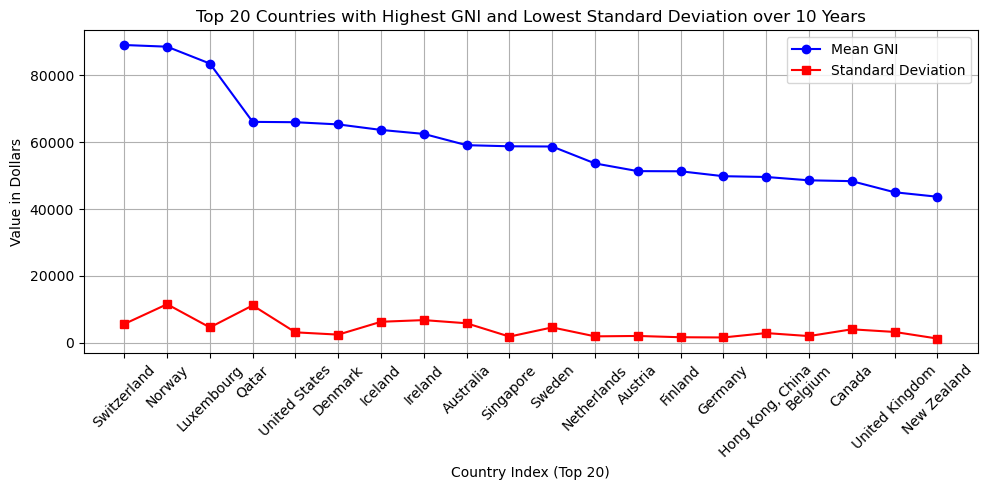

In [252]:
#Top 20 countries, highest GNI with lowest STD
sorted_countries_gni = summary_gni.sort_values(by=['mean_gni', 'std_gni'], ascending=[False, True])
top_20_countries = sorted_countries_gni.head(20)

# Plotting
plt.figure(figsize=(10, 5))

# Plotting the average GNI line
plt.plot(range(len(top_20_countries)), top_20_countries['mean_gni'], marker='o', label='Mean GNI', color='blue')

# Plotting the standard deviation line
plt.plot(range(len(top_20_countries)), top_20_countries['std_gni'], marker='s', label='Standard Deviation', color='red')

plt.xlabel('Country Index (Top 20)')
plt.ylabel('Value in Dollars')
plt.title('Top 20 Countries with Highest GNI and Lowest Standard Deviation over 10 Years')
plt.xticks(range(len(top_20_countries)), top_20_countries['country'], rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

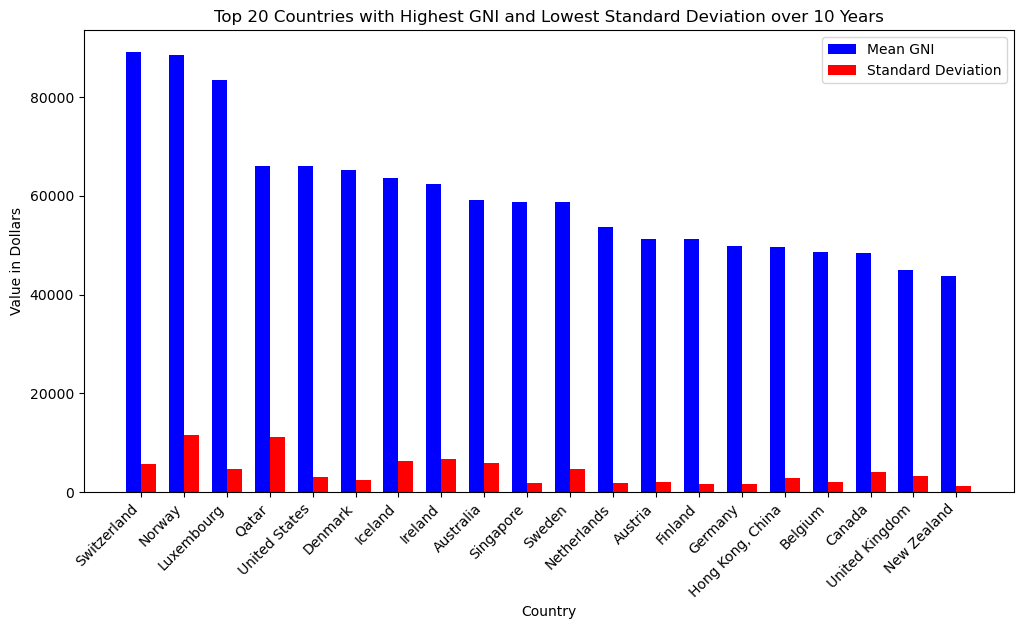

In [262]:
#plotting the same information as a bar graph  - Top 20 countries, highest GNI with lowest STD

plt.figure(figsize=(12, 6))

# Define the width of each bar
bar_width = 0.35

# Plotting the mean GNI bars
plt.bar(index, top_20_countries['mean_gni'], bar_width, color='blue', label='Mean GNI')

# Plotting the standard deviation bars
plt.bar(index + bar_width, top_20_countries['std_gni'], bar_width, color='red', label='Standard Deviation')

plt.xlabel('Country')
plt.ylabel('Value in Dollars')
plt.title('Top 20 Countries with Highest GNI and Lowest Standard Deviation over 10 Years')
plt.xticks(index + bar_width / 2, top_20_countries['country'], rotation=45, ha='right')
plt.legend();

These charts represents the 20 countries with the highest GNI per capita. Countries with higher GNI typically have stronger and more stable economies. This in relation with low standard deviation in GNI might suggest a more stable and consistent distribution of income within the economy, as well as more resistant to inflation.

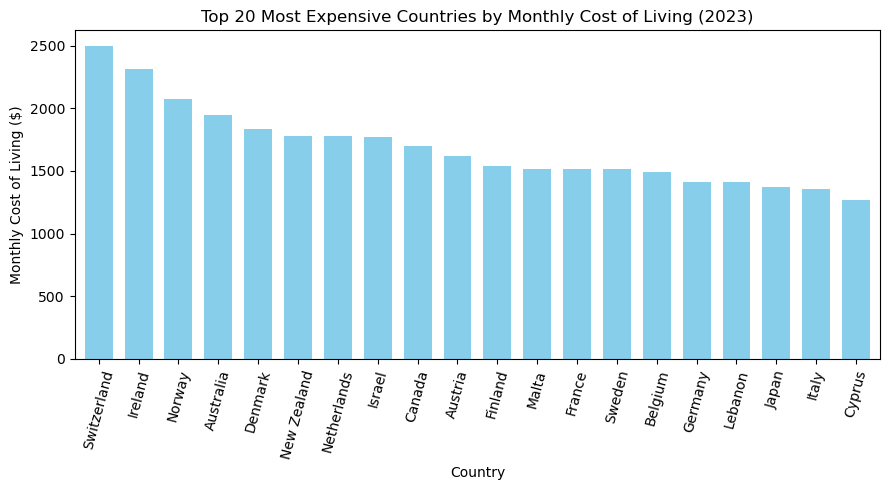

In [264]:
#Checking which countries are the most expensive 

expensive_countries = happiness_col.sort_values(by='col_monthly_2023', ascending=False).head(20)

#plotting 
plt.figure(figsize=(9, 5))
expensive_countries = expensive_countries.set_index('country')
expensive_countries['col_monthly_2023'].plot(kind='bar',color='skyblue', width=0.7)

plt.title('Top 20 Most Expensive Countries by Monthly Cost of Living (2023)')
plt.xlabel('Country')
plt.ylabel('Monthly Cost of Living ($)')
plt.xticks(rotation=75)  # Rotate x-axis labels for better readability

# Show plot
plt.tight_layout()
plt.show()

Examining both visualizations, it becomes apparent that many countries boasting the highest Gross National Income (GNI) are also showcased among the top 20 countries with the highest monthly cost of living. This observation hints at a potential correlation between a country's stability and economic power with its cost of living. Considering retirees often rely on fixed incomes, excessively expensive countries may not be the ideal retirement destinations.

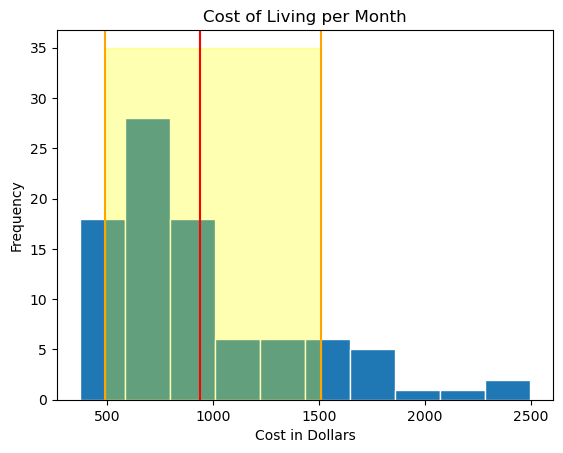

In [265]:
#plotting the cost of living
happiness_col['col_monthly_2023'].plot.hist(edgecolor = 'white')

#set title and labels 
plt.title('Cost of Living per Month')
plt.xlabel('Cost in Dollars')
plt.axvline(col_mean, color='red')
plt.axvline(col_std_lower, color='orange')
plt.axvline(col_std_higher, color='orange')
plt.fill_betweenx([0,35], col_std_lower, col_std_higher, color='yellow', alpha=0.3, label='1 Std Dev');

The average of the cost of living montly is around $936. This distribution is skewed to the right, with most countries falling to the left of the average. We want to find those countries in between.To achieve this, I calculated a range using the stardard deviation to highlight the possible countries where one would want to retire to. We well use this "middle ground" to compare it to those countries with the highest happiness scores as well as highest life expectancy

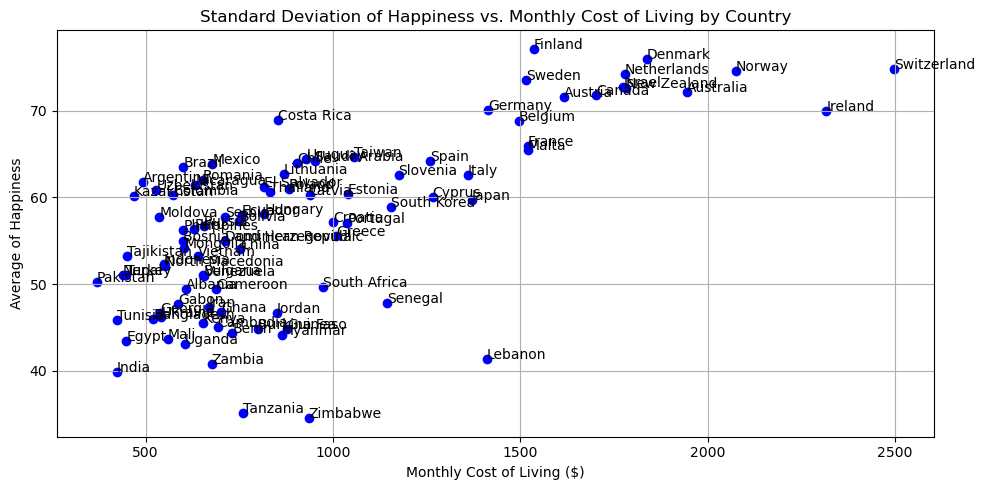

In [417]:
#Is there a relationship between average happiness and cost of living? 

plt.figure(figsize=(10, 5))

plt.scatter(avr_happ_col['col_monthly_2023'], avr_happ_col['mean_happ'], color='blue')

# Add country labels
for i, country in enumerate(avr_happ_col['country']):
    plt.text(avr_happ_col['col_monthly_2023'][i], avr_happ_col['mean_happ'][i], country)

# Set title and labels
plt.title('Standard Deviation of Happiness vs. Monthly Cost of Living by Country')
plt.xlabel('Monthly Cost of Living ($)')
plt.ylabel('Average of Happiness')

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show();

In this visualization, Switzerland stands out as an outlier, boasting both the highest happiness score and cost of living. Lebanon has a high cost of living but maintains a happiness score in the lower range, close to 40. The majority of countries cluster towards the left of the chart, generally slighly below the average happiness score of 68, with a cost of living ranging between 500 and 1000.

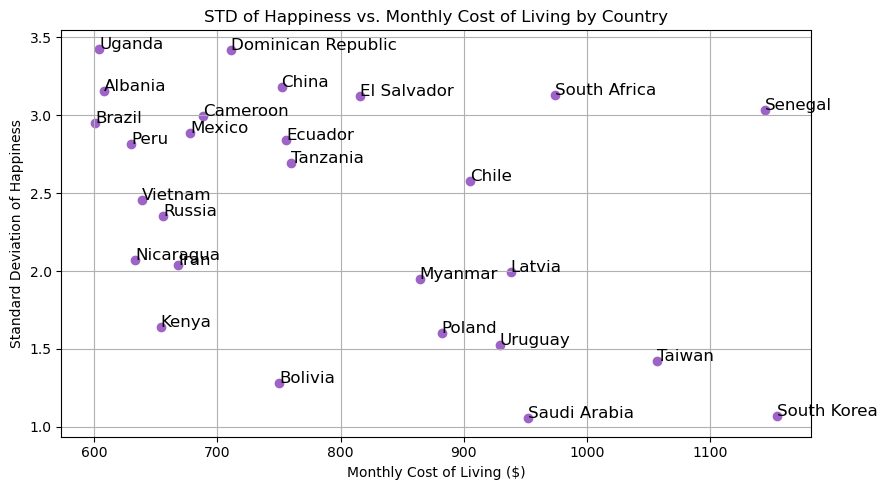

In [291]:
##Seeking countries with relatively uniform levels of happiness among the population alongside a reasonable cost of living

plt.figure(figsize=(9, 5))  # Adjusting the figure size to be smaller

# Create scatter plot
plt.scatter(filtered_data['col_monthly_2023'], filtered_data['std_happ'], color='#9d63c7')

# Add country labels with larger font size
for i, country in enumerate(filtered_data['country']):
    plt.text(filtered_data['col_monthly_2023'].iloc[i], filtered_data['std_happ'].iloc[i], country, fontsize=12)

# Set title and labels
plt.title('STD of Happiness vs. Monthly Cost of Living by Country')
plt.xlabel('Monthly Cost of Living ($)')
plt.ylabel('Standard Deviation of Happiness')

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

South Korea and Senegal stand out as outliers in the data. South Korea exhibits a relatively high cost of living, yet its population appears to be relatively happy. On the other hand, Senegal also faces high costs of living, but there is more disparity in the overall level of happiness among its population.

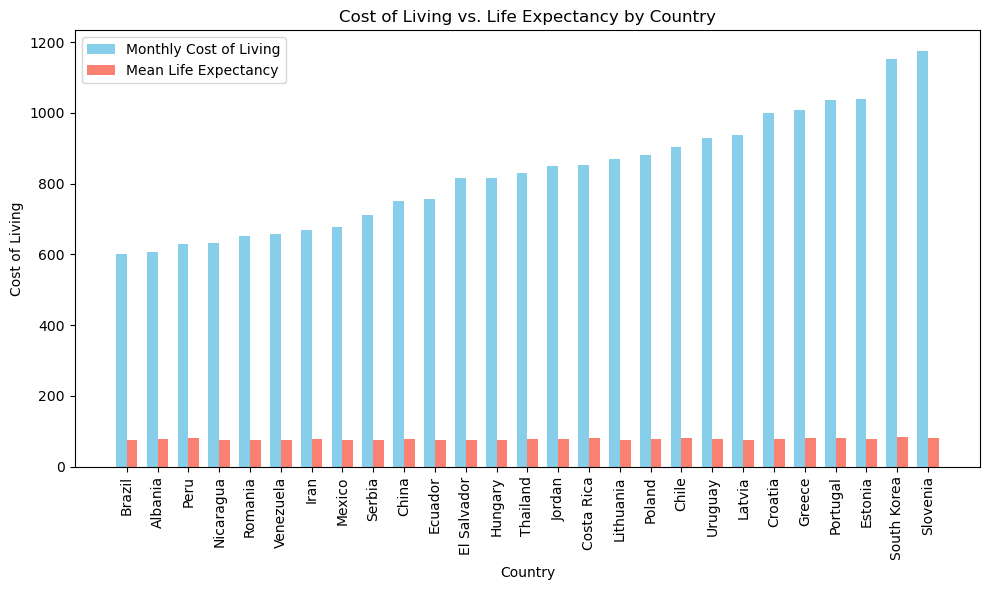

In [377]:
#Countries that have a life expectancy higher than 75 years old and a cost of living in between 600 and 1,200 dollars

plt.figure(figsize=(10, 6))

# Define the width of the bars
bar_width = 0.35

# Define the positions for the bars
positions = range(len(sorted_life_col))

# Plot the bars for cost of living
plt.bar(positions, sorted_life_col['col_monthly_2023'], bar_width, label='Monthly Cost of Living', color='skyblue')

# Plot the bars for life expectancy
plt.bar([p + bar_width for p in positions], sorted_life_col['mean_life_expectancy'], bar_width, label='Mean Life Expectancy', color='salmon')

# Set x-axis labels with vertical orientation
plt.xticks([p + bar_width / 2 for p in positions], sorted_life_col['country'], rotation=90)  

# Set labels and title
plt.xlabel('Country')
plt.ylabel('Cost of Living')
plt.title('Cost of Living vs. Life Expectancy by Country')
plt.legend()

plt.tight_layout()
plt.show()

All the countries highlighted in this chart offer favorable conditions for retirement, featuring good life expectancy and relatively low costs of living. We will be analyzing this visualization alongside others to identify countries that fulfill all the criteria, including good life expectancy, low cost of living, and high happiness scores.

## Conclusions and Recommendations

Countries with higher GNI levels tend to exhibit higher costs of living, while those with lower GNIs often feature more affordable living expenses. Interestingly, life expectancies in higher GNI countries did not vary much from middle income countries. The objective of this study was to identify countries that strike a balance between these factors, offering good quality of life, relatively low cost of living, and economies conducive to promoting sustainable retirement lifestyles. The countries show:

 - Brazil, with monthly rent of 601 dollars and and average happiness score of 63.4
 - Peru, with monthly rent of 630 dollars and and average happiness score of 56.3  - Nicaragua, with monthly rent of 633 dollars and and average happiness score of 61.4
 - Iran, with monthly rent of 668 dollars and and average happiness score of 47.3
 - Poland, with monthly rent of 882 dollars and and average happiness score of 60.9
 - Uruguay, with monthly rent of 929 dollars and and average happiness score of 64.4below 
      |

### Further considerations:

This analysis has not addressed two crucial factors that are pivotal for retirees: the accessibility and quality of healthcare, and the visa requirements for the selected countries. As individuals age, their healthcare needs often increase, emphasizing the importance of evaluating the healthcare infrastructure and services available in potential retirement destinations. Additionally, understanding visa requirements is essential for retirees planning to relocate to another country, as it directly affects their eligibility and ability to reside in their chosen destination. Therefore, further investigation into these areas is necessary to provide a more comprehensive assessment of suitable retirement destinations.